In [1]:
import pandas as pd
import numpy as np
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Modelo de Regressão Linear Simples

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Fávero e Belfiore

## Contexto

 - CPI: corruption perception index
 - Idade: idade média dos bilionários
 - Horas: quantidade média de horas trabalhadas pela população economicamente ativa

In [2]:
#Importa base e transforma em objeto
rData = pyreadr.read_r(r'bases\paises.RData')

#Verifica o nomne do objeto
print(rData.keys())

odict_keys(['paises'])


In [3]:
#Transforma o objeto em um pandas DataFrame
paises = rData['paises']
paises.head()

,pais,cpi,idade,horas
rownames,,,,
1,Argentina,3.9,72,35.0
2,Australia,8.7,64,32.0
3,Austria,7.9,72,32.0
4,Belgium,7.1,67,30.1
5,Brazil,4.0,59,35.0


In [4]:
paises.describe()

,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.799999
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.099998


### Mapa 3D

In [7]:
import plotly.graph_objects as go


# Create the figure
fig = go.Figure(data=[go.Scatter3d(x=paises['idade'], 
                                   y=paises['cpi'], 
                                   z=paises['horas'], 
                                   mode='markers',
                                   marker={'size': 3,'opacity': 0.8},
                                  text=paises.index)])

# Set the axis labels
fig.update_layout(scene=dict(xaxis_title='idade', yaxis_title='cpi', zaxis_title='horas'))

# Show the plot
fig.show()

### Gráfico de Correlação

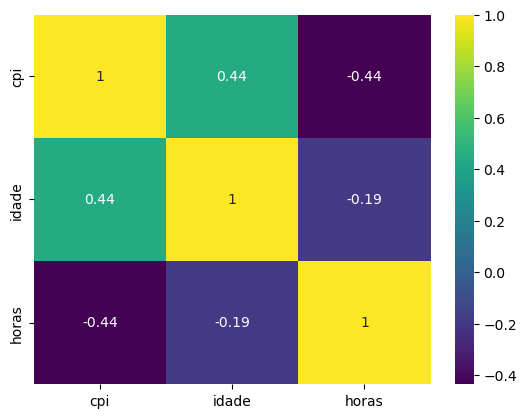

In [8]:
matriz_corr = paises.corr()

#Gráfico matriz correlação

sns.heatmap(matriz_corr, cmap='viridis', annot=True)
plt.show()

### Chat Correlation

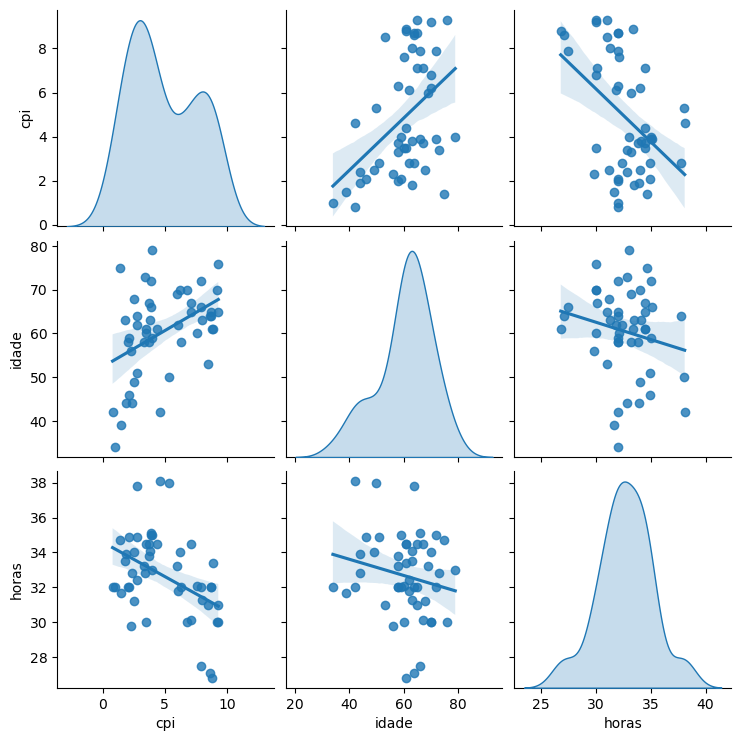

In [9]:
#Scatter Matrix
sns.pairplot(paises.iloc[:,1:], diag_kind='kde', kind='reg')
plt.show()

<Figure size 1500x1000 with 0 Axes>

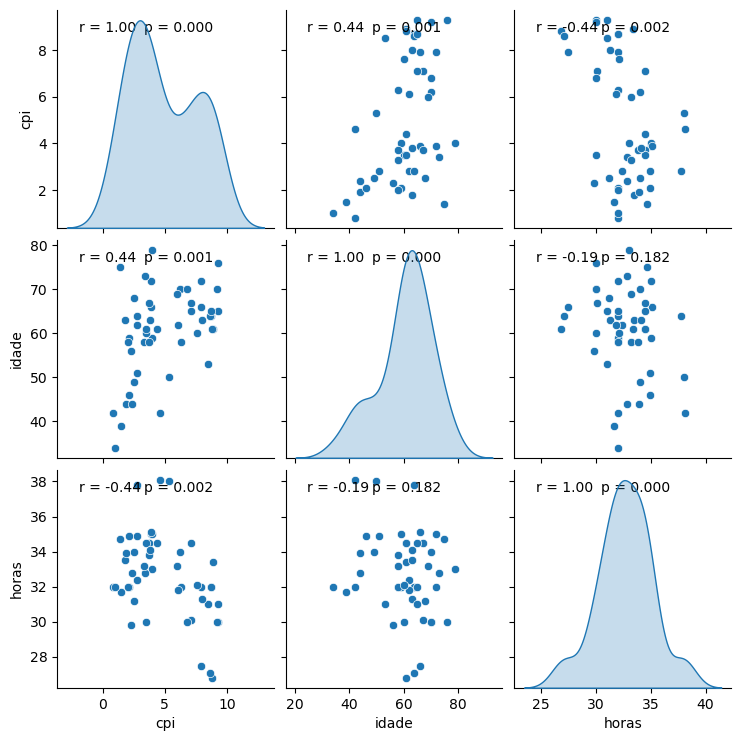

In [11]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(paises, diag_kind="kde")
graph.map(corrfunc)
plt.show()


## Modelo de Regressão Múltipla

In [12]:
#Estimando o modelo
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
import statsmodels.api as sm

modelo = sm.OLS.from_formula(formula = 'cpi ~ idade + horas', data=paises.iloc[:,1:]).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.26
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           0.000101
Time:                        16:23:30   Log-Likelihood:                -109.93
No. Observations:                  50   AIC:                             225.9
Df Residuals:                      47   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9719      5.165      2.318      0.025       1.581      22.363
idade          0.0997      0.033      3.052      0.004       0.034       0.165
horas         -0.4013      0.135     -2.980      0.005      -0.672      -0.130
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.762
Skew:                           0.131   Prob(JB):                        0.414
Kurtosis:                       2.119   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo.conf_int(alpha=0.05)

,0,1
Intercept,1.580527,22.363308
idade,0.033986,0.165410
horas,-0.672256,-0.130418


In [14]:
paises['cpifit'] = modelo.fittedvalues
paises

,pais,cpi,idade,horas,cpifit
rownames,,,,,
1,Argentina,3.9,72,35.000000,5.103394
2,Australia,8.7,64,32.000000,5.509820
3,Austria,7.9,72,32.000000,6.307404
4,Belgium,7.1,67,30.100000,6.571454
5,Brazil,4.0,59,35.000000,3.807319
6,Canada,8.9,61,33.400002,4.648853
7,Chile,6.2,70,34.000000,5.305335
8,China,2.5,49,34.000000,3.211674
9,Colombia,4.0,79,33.000000,6.603954


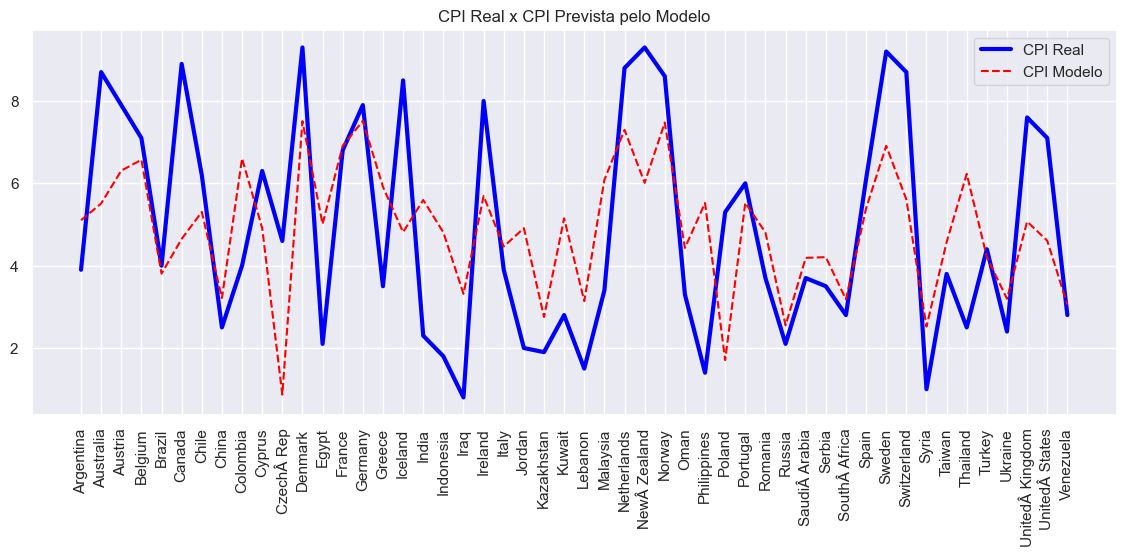

In [15]:

#Gráfico com backtest do modelo
sns.set(rc={'figure.figsize':(14, 5)})

plt.title('CPI Real x CPI Prevista pelo Modelo')
plt.plot(paises['pais'],paises['cpi'],  color = 'blue', linewidth=3,  label= 'CPI Real')
plt.plot(paises['pais'],paises['cpifit'],  color = 'red', linestyle='dashed', label = 'CPI Modelo')
plt.xticks(paises['pais'], rotation=90)
plt.legend()
     

In [17]:
# In[ ]: Gráfico 3D com scatter e fitted values resultantes do modelo

trace = go.Scatter3d(
    x=paises['horas'], 
    y=paises['idade'], 
    z=paises['cpi'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
    xaxis_title='X AXIS TITLE',
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.add_trace(go.Mesh3d(
                    x=paises['horas'], 
                    y=paises['idade'], 
                    z=paises['cpifit'], 
                    opacity=0.5,
                    color='pink'
                  ))
plot_figure.update_layout(scene = dict(
                        xaxis_title='horas',
                        yaxis_title='idade',
                        zaxis_title='cpi'))
plot_figure.show()